In [1]:
import numpy as np
import pandas as pd
import mpmath as mp

import matplotlib.pyplot as plt

In [2]:
circuits = pd.read_csv('data/recent/recent_circuits_with_length.csv', index_col=0)
drivers = pd.read_csv('data/recent/recent_drivers.csv', index_col=0)
laptimes = pd.read_csv('data/recent/recent_laptimes.csv', index_col=0)
races = pd.read_csv('data/recent/recent_races.csv', index_col=0)

In [3]:
races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
1018,1031,2020,1,70,Austrian Grand Prix,2020-07-05,13:10:00,http://en.wikipedia.org/wiki/2020_Austrian_Gra...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1019,1032,2020,2,70,Styrian Grand Prix,2020-07-12,13:10:00,http://en.wikipedia.org/wiki/2020_Styrian_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1020,1033,2020,3,11,Hungarian Grand Prix,2020-07-19,13:10:00,http://en.wikipedia.org/wiki/2020_Hungarian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1021,1034,2020,4,9,British Grand Prix,2020-08-02,13:10:00,http://en.wikipedia.org/wiki/2020_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1022,1035,2020,5,9,70th Anniversary Grand Prix,2020-08-09,13:10:00,http://en.wikipedia.org/wiki/70th_Anniversary_...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,1092,2022,18,22,Japanese Grand Prix,2022-10-09,05:00:00,http://en.wikipedia.org/wiki/2022_Japanese_Gra...,2022-10-07,03:00:00,2022-10-07,06:00:00,2022-10-08,03:00:00,2022-10-08,06:00:00,\N,\N
1075,1093,2022,19,69,United States Grand Prix,2022-10-23,19:00:00,http://en.wikipedia.org/wiki/2022_United_State...,2022-10-21,19:00:00,2022-10-21,22:00:00,2022-10-22,19:00:00,2022-10-22,22:00:00,\N,\N
1076,1094,2022,20,32,Mexico City Grand Prix,2022-10-30,20:00:00,http://en.wikipedia.org/wiki/2022_Mexican_Gran...,2022-10-28,18:00:00,2022-10-28,21:00:00,2022-10-29,17:00:00,2022-10-29,20:00:00,\N,\N
1077,1095,2022,21,18,Brazilian Grand Prix,2022-11-13,18:00:00,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...,2022-11-11,15:30:00,2022-11-12,15:30:00,\N,\N,2022-11-11,19:00:00,2022-11-12,19:30:00


In [4]:
circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt,url,length
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,5027
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.0325,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...,5412
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.5700,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...,4675
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.9517,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park,5338
5,6,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.7347,7.42056,7,http://en.wikipedia.org/wiki/Circuit_de_Monaco,3337
6,7,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada,45.5000,-73.52280,13,http://en.wikipedia.org/wiki/Circuit_Gilles_Vi...,4361
8,9,silverstone,Silverstone Circuit,Silverstone,UK,52.0786,-1.01694,153,http://en.wikipedia.org/wiki/Silverstone_Circuit,5891
10,11,hungaroring,Hungaroring,Budapest,Hungary,47.5789,19.24860,264,http://en.wikipedia.org/wiki/Hungaroring,4381
12,13,spa,Circuit de Spa-Francorchamps,Spa,Belgium,50.4372,5.97139,401,http://en.wikipedia.org/wiki/Circuit_de_Spa-Fr...,7004
13,14,monza,Autodromo Nazionale di Monza,Monza,Italy,45.6156,9.28111,162,http://en.wikipedia.org/wiki/Autodromo_Naziona...,5793


In [5]:
laptimes

,raceId,driverId,lap,position,time,milliseconds
472504,1031,822,1,1,1:11.454,71454
472505,1031,822,2,1,1:09.441,69441
472506,1031,822,3,1,1:09.598,69598
472507,1031,822,4,1,1:09.592,69592
472508,1031,822,5,1,1:09.159,69159
...,...,...,...,...,...,...
538116,1096,822,53,16,1:32.998,92998
538117,1096,822,54,16,1:32.995,92995
538118,1096,822,55,16,1:31.236,91236
538119,1096,822,56,15,1:30.566,90566


In [6]:
detailed_laptimes = laptimes.merge(drivers[['driverId', 'surname']], how='left', on='driverId').merge(races[['raceId', 'date', 'year', 'circuitId']], how='left', on='raceId').merge(circuits[['circuitId', 'name', 'length']], how='left', on='circuitId').rename(columns={"name": "circuit_name", "year": "season"})
detailed_laptimes

,raceId,driverId,lap,position,time,milliseconds,surname,date,season,circuitId,circuit_name,length
0,1031,822,1,1,1:11.454,71454,Bottas,2020-07-05,2020,70,Red Bull Ring,4318
1,1031,822,2,1,1:09.441,69441,Bottas,2020-07-05,2020,70,Red Bull Ring,4318
2,1031,822,3,1,1:09.598,69598,Bottas,2020-07-05,2020,70,Red Bull Ring,4318
3,1031,822,4,1,1:09.592,69592,Bottas,2020-07-05,2020,70,Red Bull Ring,4318
4,1031,822,5,1,1:09.159,69159,Bottas,2020-07-05,2020,70,Red Bull Ring,4318
...,...,...,...,...,...,...,...,...,...,...,...,...
65612,1096,822,53,16,1:32.998,92998,Bottas,2022-11-20,2022,24,Yas Marina Circuit,5554
65613,1096,822,54,16,1:32.995,92995,Bottas,2022-11-20,2022,24,Yas Marina Circuit,5554
65614,1096,822,55,16,1:31.236,91236,Bottas,2022-11-20,2022,24,Yas Marina Circuit,5554
65615,1096,822,56,15,1:30.566,90566,Bottas,2022-11-20,2022,24,Yas Marina Circuit,5554


season
2022     3.3993273973465e-8
2021    3.35276126861572e-8
2020    2.91038304567337e-8


<Axes: xlabel='season'>

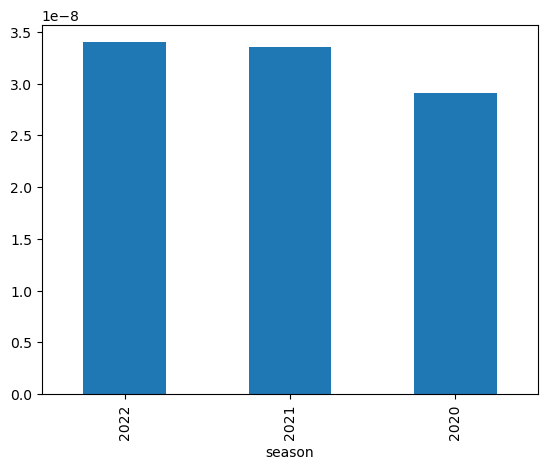

In [7]:
driver_groups = detailed_laptimes.groupby("season")
c = 299792458 # in m/s

def time_finder(df):
    total_length = mp.fsum(df['length'])
    total_seconds = mp.fdiv(mp.fsum(df['milliseconds']), 1000)
    avg_speed = mp.fdiv(total_length, total_seconds)
    gamma = mp.fdiv(1, mp.sqrt(mp.fsub(1, mp.power(mp.fdiv(avg_speed, c), 2))))

    driver_time = mp.fdiv(total_seconds, gamma)
    return mp.fsub(total_seconds, driver_time)

time_deltas_by_driver = driver_groups[['length', 'milliseconds']].apply(time_finder)
print(time_deltas_by_driver.sort_values(ascending=False).to_string())
time_deltas_by_driver.astype(np.longdouble).sort_values(ascending=False).plot(kind="bar")

In [8]:
def get_max_scale(season):
    df = detailed_laptimes.groupby("season").get_group(season)
    total_length = mp.fsum(df['length'])
    total_seconds = mp.fdiv(mp.fsum(df['milliseconds']), 1000)
    avg_speed = mp.fdiv(total_length, total_seconds)

    return mp.fdiv(c, avg_speed)

In [9]:
def scale_time_finder(scale, season=2021):
    df = detailed_laptimes.groupby("season").get_group(season)
    total_length = mp.fsum(df['length'])
    total_seconds = mp.fdiv(mp.fsum(df['milliseconds']), 1000)
    avg_speed = mp.fmul(mp.fdiv(total_length, total_seconds), scale)
    gamma = mp.fdiv(1, mp.sqrt(mp.fsub(1, mp.power(mp.fdiv(avg_speed, c), 2))))

    driver_time = mp.fdiv(total_seconds, gamma)
    return mp.fmul(mp.fdiv(mp.fsub(total_seconds, driver_time), total_seconds), 100)

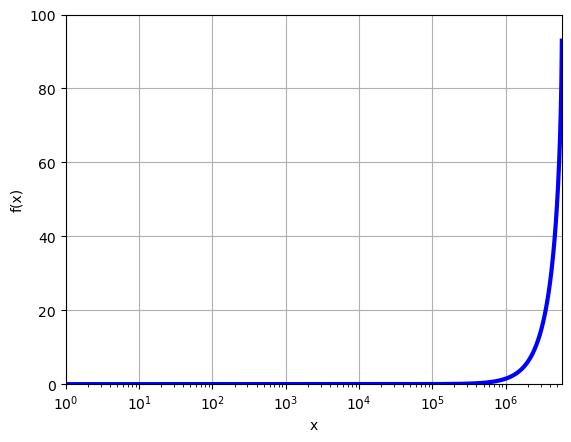

In [13]:
fig, ax = plt.subplots()
mp.plot(scale_time_finder, xlim=[1, get_max_scale(2021)], ylim=[0, 100], points=400, axes=ax)
ax.set_xscale('log')